### #01. 데이터 분포
---
#### 문제 1.

kings_life 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다.

수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.


In [2]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [3]:
origin = load_data("kings_life")
origin

[data] https://data.hossam.kr/data/lab06/kings_life.xlsx
[desc] 조선시대 역대 왕의 수명을 조사한 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


In [4]:
desc = origin['수명'].describe()
desc

count    27.000000
mean     46.037037
std      16.173296
min      16.000000
25%      33.000000
50%      45.000000
75%      56.000000
max      82.000000
Name: 수명, dtype: float64

In [5]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR" 
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

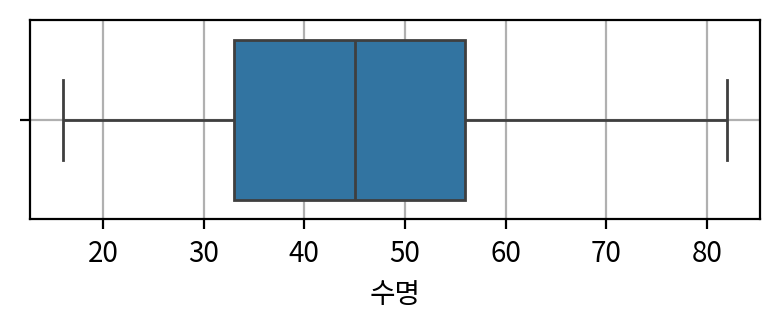

In [6]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 800             #그래프 가로 크기
height_px = 350             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=origin['수명'], orient='h')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 역대 왕의 평균나이는 46세이다.
- 제일 조금밖에 못산 왕의 나이는 16세이며 가장 오래산 왕의 나이는 82세이다.
- 대부분의 왕은 30대 중반~ 50대 중반의 삶을 끝으로 마무리했다.

In [7]:
origin = load_data('stock')
origin

[data] https://data.hossam.kr/data/lab06/stock.xlsx
[desc] 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


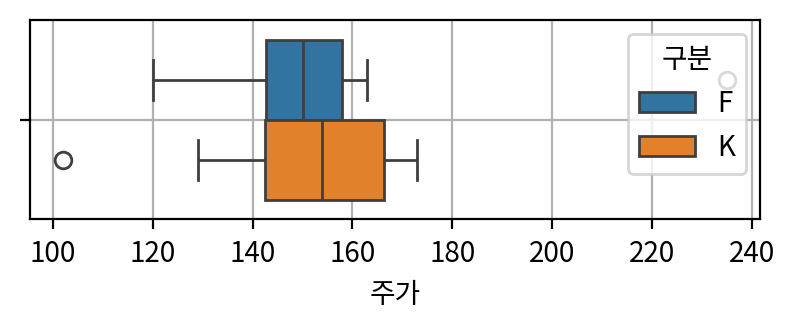

In [8]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 800            #그래프 가로 크기
height_px = 350             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=origin, x='주가', hue='구분')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

외국계보다 우리나라 기업의 주가가 민맥스 값이 더 높고, 평균도 높다.

주가 범위의 저점은 비슷하지만 고점은 우리나라가 더 높다.

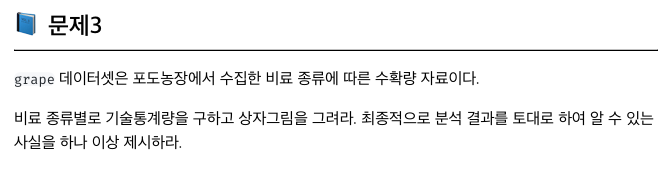

In [9]:
origin = load_data('grape')
origin

[data] https://data.hossam.kr/data/lab06/grape.xlsx
[desc] 포도농장에서 수집한 비료 종류에 따른 수확량 자료 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [10]:
df = origin.groupby('비료종류')['수확량'].describe()
df

,count,mean,std,min,25%,50%,75%,max
비료종류,,,,,,,,
A,7.0,26.357143,6.578211,17.9,23.950,24.3,27.550,39.3
B,4.0,18.700000,6.172520,11.4,15.225,18.8,22.275,25.8


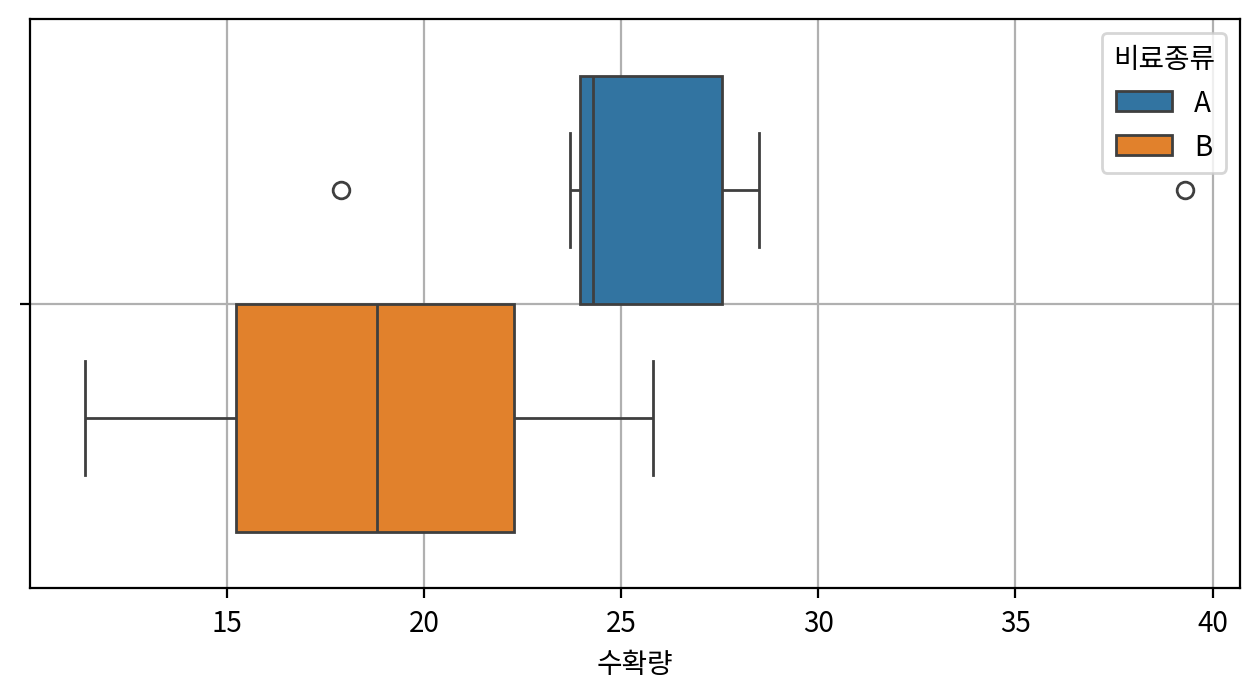

In [11]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=origin, x='수확량', hue='비료종류')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- A 비료종류를 사용했을때 수확량이 많다.
- A 비료종류의 최솟값이 B 비료종류의 정상범위 내의 최댓값보다 크다.
- 가격 데이터가 없어서 그렇지만 가격이 드라마틱하게 큰 차이가 나는 것이 아니라면 A 비료를 쓰는 것이 맞다고 보인다.

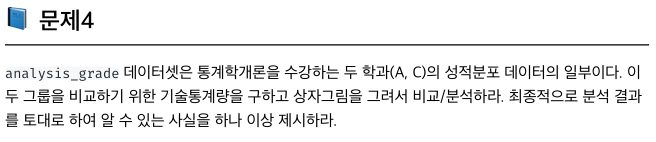

In [12]:
origin=load_data('analysis_grade')
origin

[data] https://data.hossam.kr/data/lab06/analysis_grade.xlsx
[desc] 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


In [13]:
df1 = origin.groupby('학과')['점수'].describe()
df1

,count,mean,std,min,25%,50%,75%,max
학과,,,,,,,,
A,20.0,43.750000,20.229928,10.0,29.50,42.5,55.00,78.0
C,12.0,56.166667,14.689720,41.0,50.25,52.5,54.25,90.0


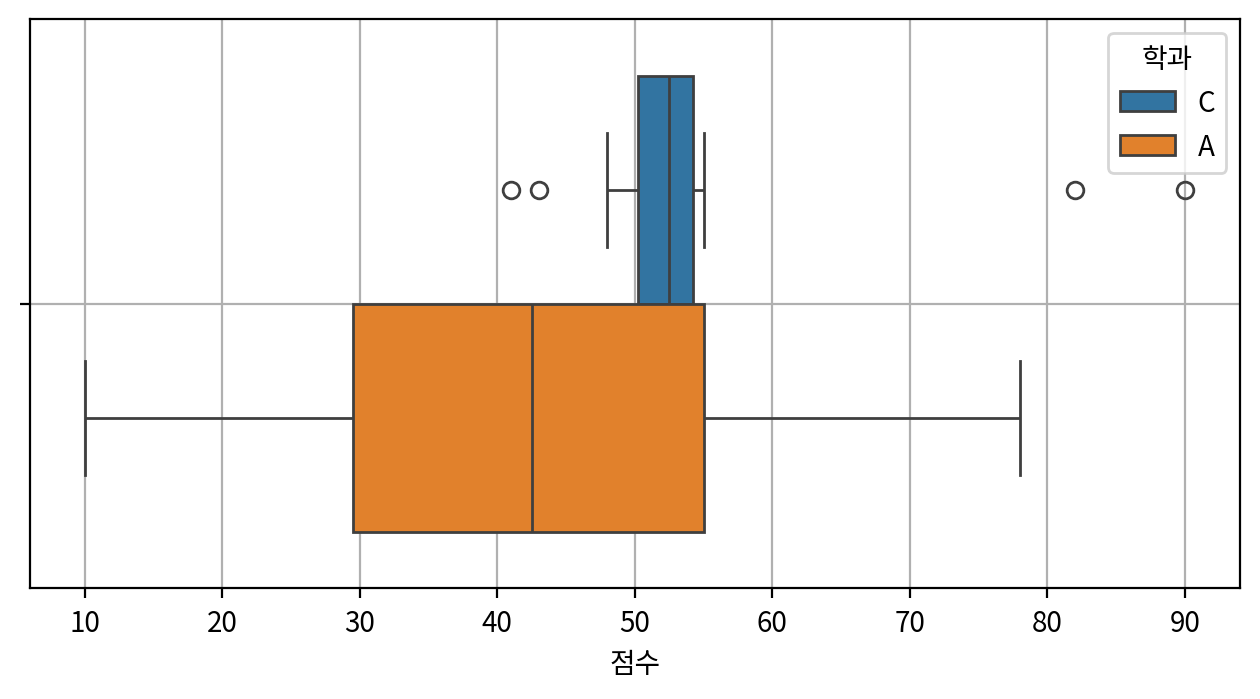

In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=origin, x='점수', hue='학과')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- C학과에는 A학과보다 통계학개론을 포기한 학생이 적다.
- C학과에는 통계학개론을 A학과보다 잘하는 학생이 존재한다.
- A학과는 C학과보다 평균이 낮다
    - 하지만, A학과에 인원이 더 많기 때문에 이걸 가지고 A학과가 공부를 더 못하는 학과라고 판단하기엔 어렵다고 생각이 됨

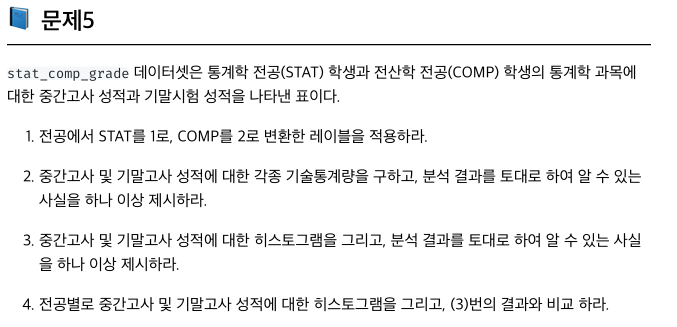

In [15]:
origin=load_data('stat_comp_grade')
origin

[data] https://data.hossam.kr/data/lab06/stat_comp_grade.xlsx
[desc] 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [16]:
# 전공의 STAT을 1, COMP를 2로 변환
df = origin.copy()
df['전공'] = np.where(df['전공']=='STAT', 1, 2)
df

,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
7,1,47,57
8,1,94,82
9,2,49,57


In [17]:
df1 = origin.groupby('전공')['중간고사'].describe()
df1

,count,mean,std,min,25%,50%,75%,max
전공,,,,,,,,
COMP,8.0,65.625000,18.423103,31.0,58.0,70.5,77.0,87.0
STAT,12.0,64.833333,21.225342,34.0,47.0,67.5,80.5,94.0


In [18]:
df2 = origin.groupby('전공')['기말고사'].describe()
df2

,count,mean,std,min,25%,50%,75%,max
전공,,,,,,,,
COMP,8.0,74.875000,18.795421,40.0,65.25,81.5,86.25,96.0
STAT,12.0,76.166667,13.953386,53.0,67.50,78.5,85.25,95.0


- 중간고사는 COMP학과가 미세한 차이로 평균이 높다.
- 기말고사에서는 STAT학과가 약 1.3점의 차이로 평균 점수가 더 높다.

In [19]:
hist, bins = np.histogram(origin['중간고사'], bins=10)
bins

array([31. , 37.3, 43.6, 49.9, 56.2, 62.5, 68.8, 75.1, 81.4, 87.7, 94. ])

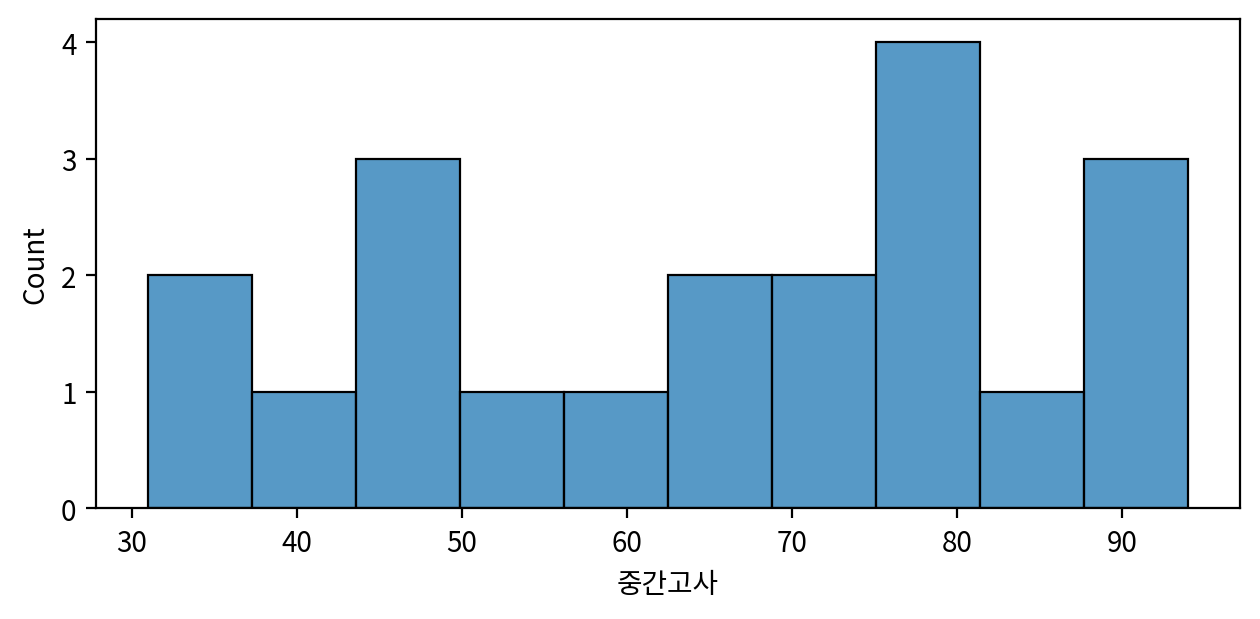

In [20]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                     #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.histplot(data=df, x='중간고사', bins=bins, edgecolor='black', linewidth=0.8)
# sb.histplot(data=df, x='기말고사', bins=bins, edgecolor='black', linewidth=0.8)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

In [21]:
hist2, bins2 = np.histogram(origin['기말고사'], bins=10)
bins2

array([40. , 45.6, 51.2, 56.8, 62.4, 68. , 73.6, 79.2, 84.8, 90.4, 96. ])

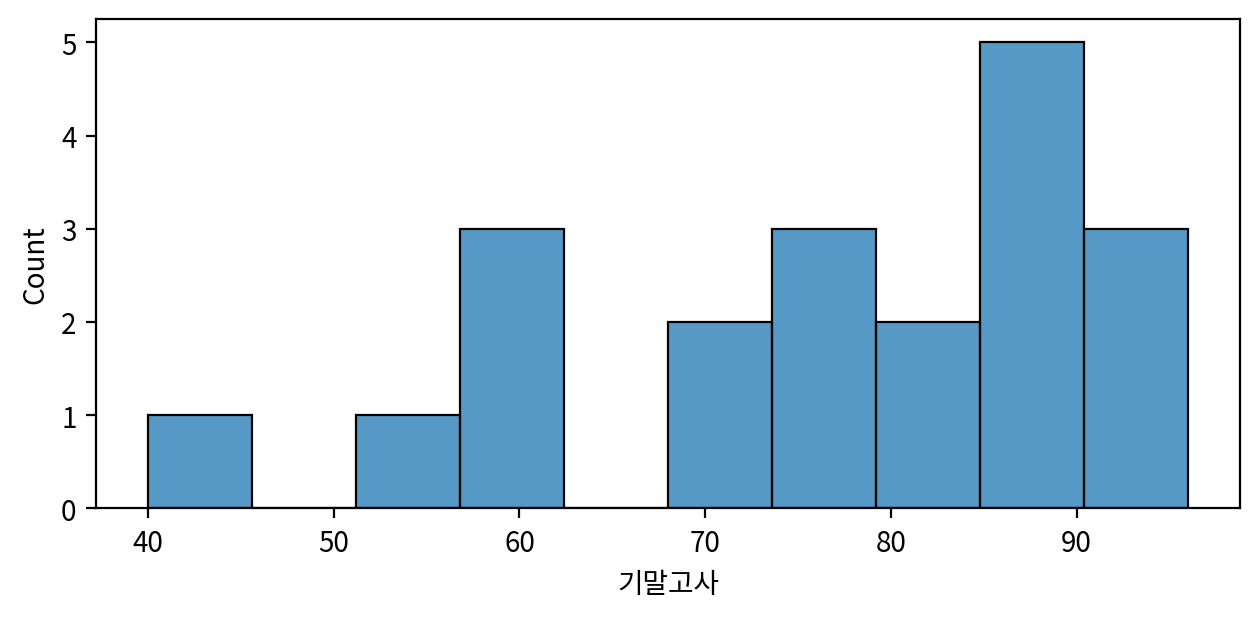

In [22]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                     #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.histplot(data=df, x='기말고사', bins=bins2, edgecolor='black', linewidth=0.8)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 전체 학생들의 평균 점수는 중간고사보다 기말고사때 더 높게 나타난다.

In [23]:
hist, bins = np.histogram(origin['중간고사'], bins=10)
bins

array([31. , 37.3, 43.6, 49.9, 56.2, 62.5, 68.8, 75.1, 81.4, 87.7, 94. ])

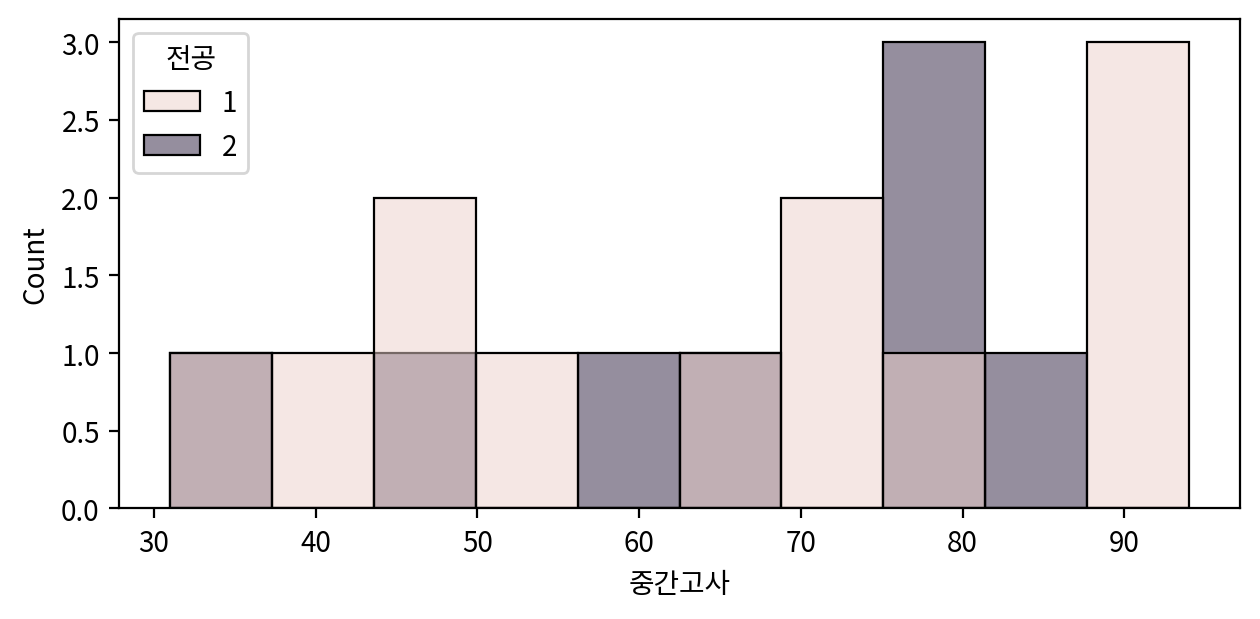

In [24]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.histplot(data=df, x='중간고사', bins=bins, edgecolor='black', linewidth=0.8, hue='전공')
# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 전공 1 학생 3명이 90점 이상의 점수를 기록했다.
- 80점대를 기록한 전공 2 학생은 4명이다.
- 전공 1,2 학생들의 점수가 고르게 분포되어있다. 

In [25]:
hist2, bins2 = np.histogram(origin['기말고사'], bins=10)
bins2

array([40. , 45.6, 51.2, 56.8, 62.4, 68. , 73.6, 79.2, 84.8, 90.4, 96. ])

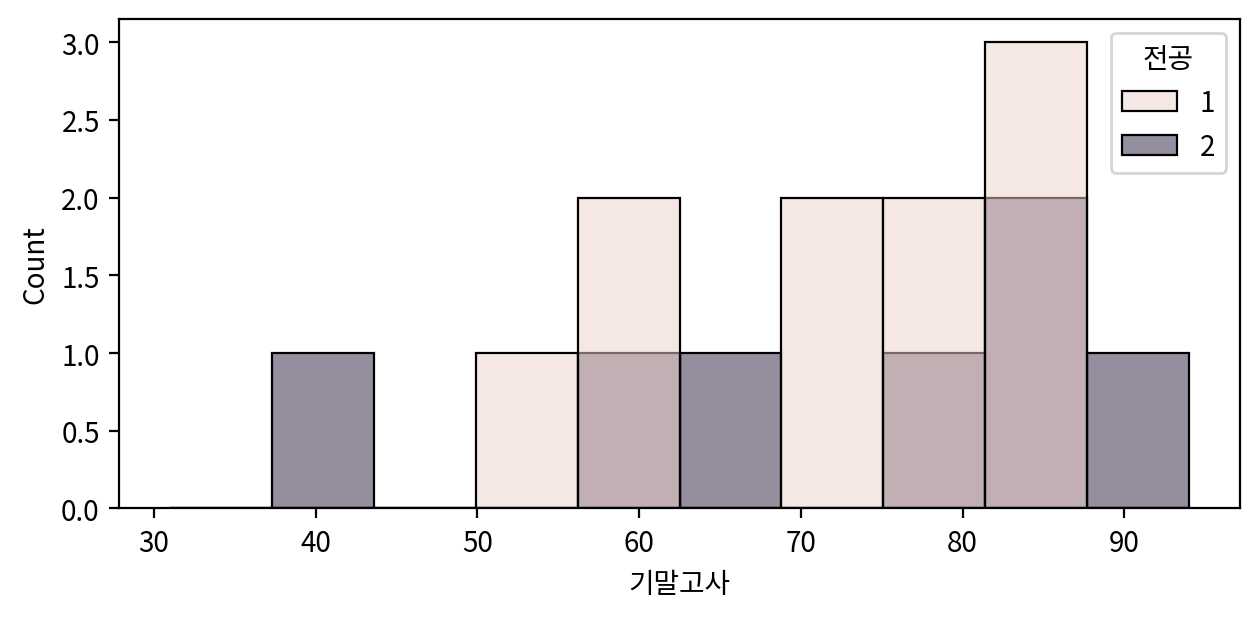

In [26]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.histplot(data=df, x='기말고사', bins=bins, edgecolor='black', linewidth=0.8, hue='전공')
# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 기말고사에서는 고득점자에 전공1이 더 많은 것을 보아 전체학생중에 시험을 잘 본 학생이 전공1 학생이 많다는 것을 알 수 있다.
- 학생들은 중간고사에 비해 기말고사에서 최고점은 떨어졌지만 대체적으로 평균 점수가 올랐다

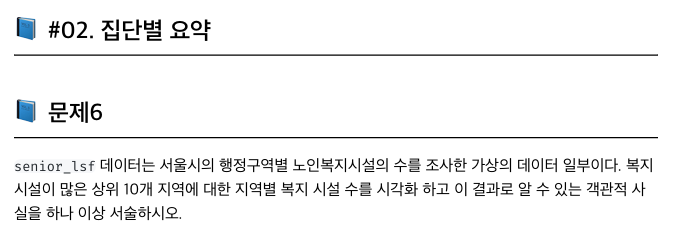

In [27]:
origin = load_data('senior_lsf')
origin

[data] https://data.hossam.kr/data/lab06/senior_lsf.xlsx
[desc] 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터
[!] Cannot read metadata


,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


In [28]:
df = origin.sort_values('복지시설', ascending=False)
df

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
14,Yangcheon-gu,192
16,Guro-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


In [29]:
df.head(10)

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
14,Yangcheon-gu,192
16,Guro-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


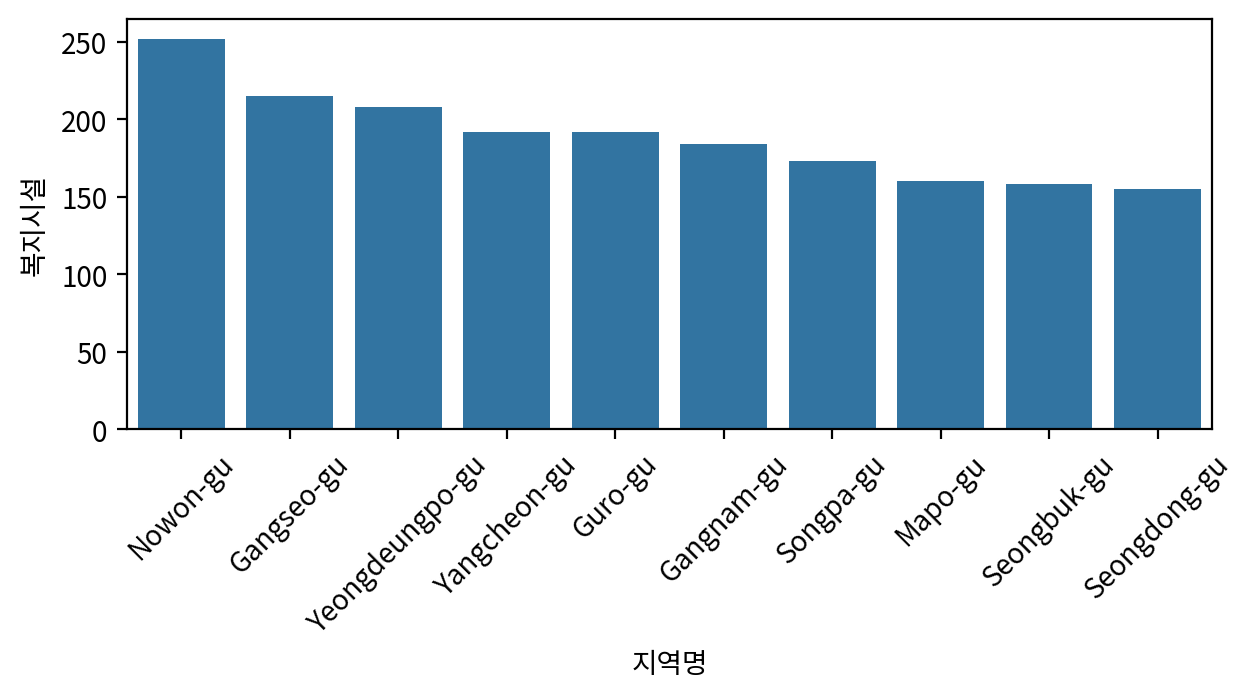

In [30]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
# sb.boxplot(data=df1, orient='h')
sb.barplot(data=df.head(10), x='지역명', y='복지시설')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.grid(True)
plt.xticks(rotation=45)
# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

복지시설이 가장 많은 구는 노원구로 252개가 있다.

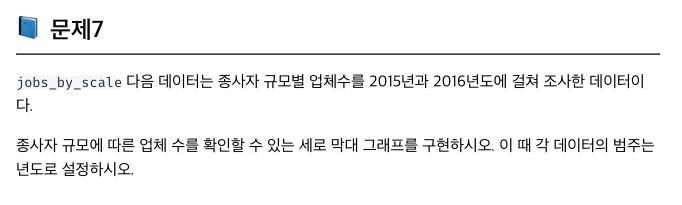

In [31]:
origin=load_data('jobs_by_scale')
origin

[data] https://data.hossam.kr/data/lab06/jobs_by_scale.xlsx
[desc] 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터 (출처: 국가통계포털)
[!] Cannot read metadata


,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


In [32]:
# 현재는 넓은 형태의 데이터 형식이니까 bar 그래프를 그리기 위해 
# 긴 형태의 데이터 형식으로 변환 = melt 함수 사용해서 년도별로 쭉 늘리기
# 참고 자료 =[LAB-05] Data Preprocessing(3)
df = origin.copy()
df2 = df.set_index('종사자규모별')
# df2
mdf = df2.reset_index().melt(id_vars='종사자규모별', 
                            var_name='연도', 
                            value_name='수치')
mdf

,종사자규모별,연도,수치
0,1~4명,2015,553.5
1,5~9명,2015,211.6
2,10~29명,2015,194.7
3,30~49명,2015,227.4
4,50~99명,2015,152.8
5,100~199명,2015,221.9
6,200~299명,2015,80.9
7,300~999명,2015,100.5
8,1000명 이상,2015,557.6
9,1~4명,2016,576.7


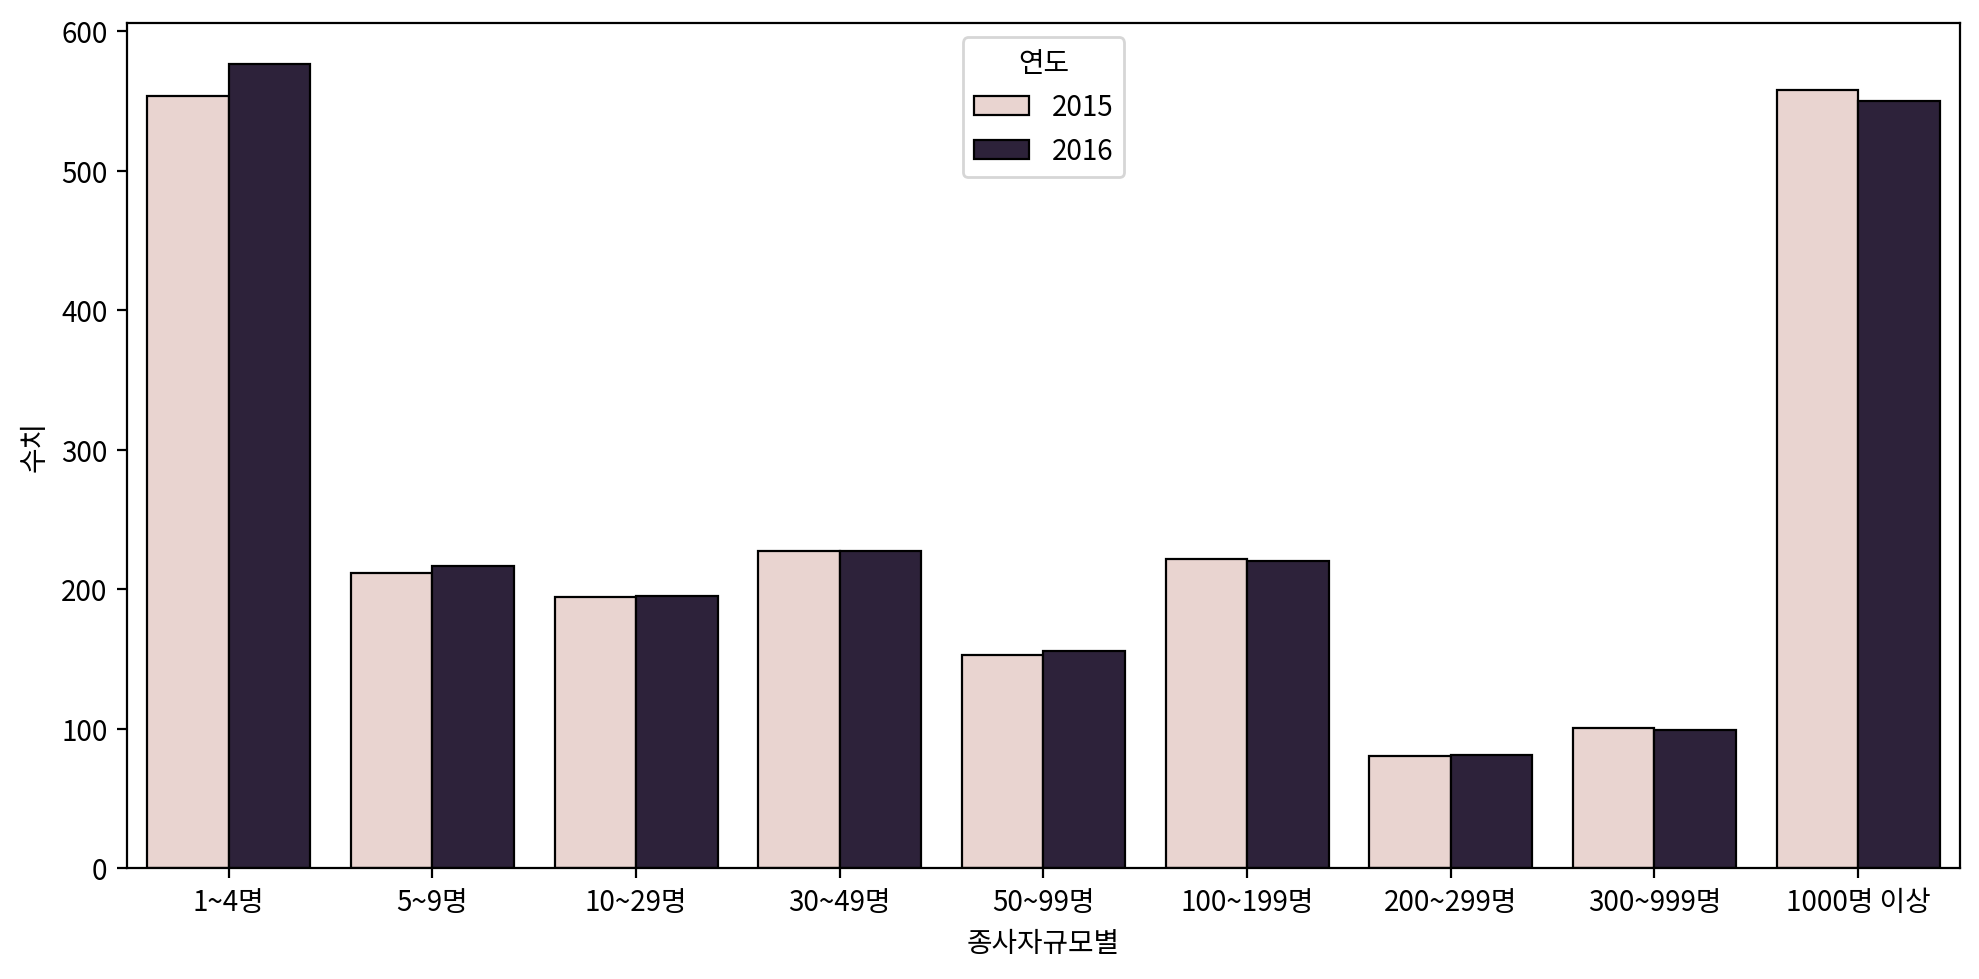

In [33]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 1000             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.barplot(data=mdf, x='종사자규모별', y='수치', hue='연도',edgecolor='black', linewidth=0.8)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
# ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

종사자 규모가 1~4명, 1000명 이상인 업체가 500명 이상으로 나타나고, 그 사이는 대부분 100명 혹은 200명의 종사자로 이루어져있다.

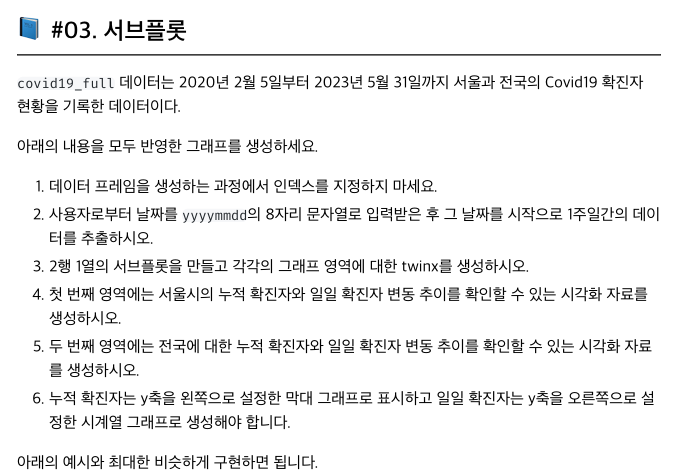

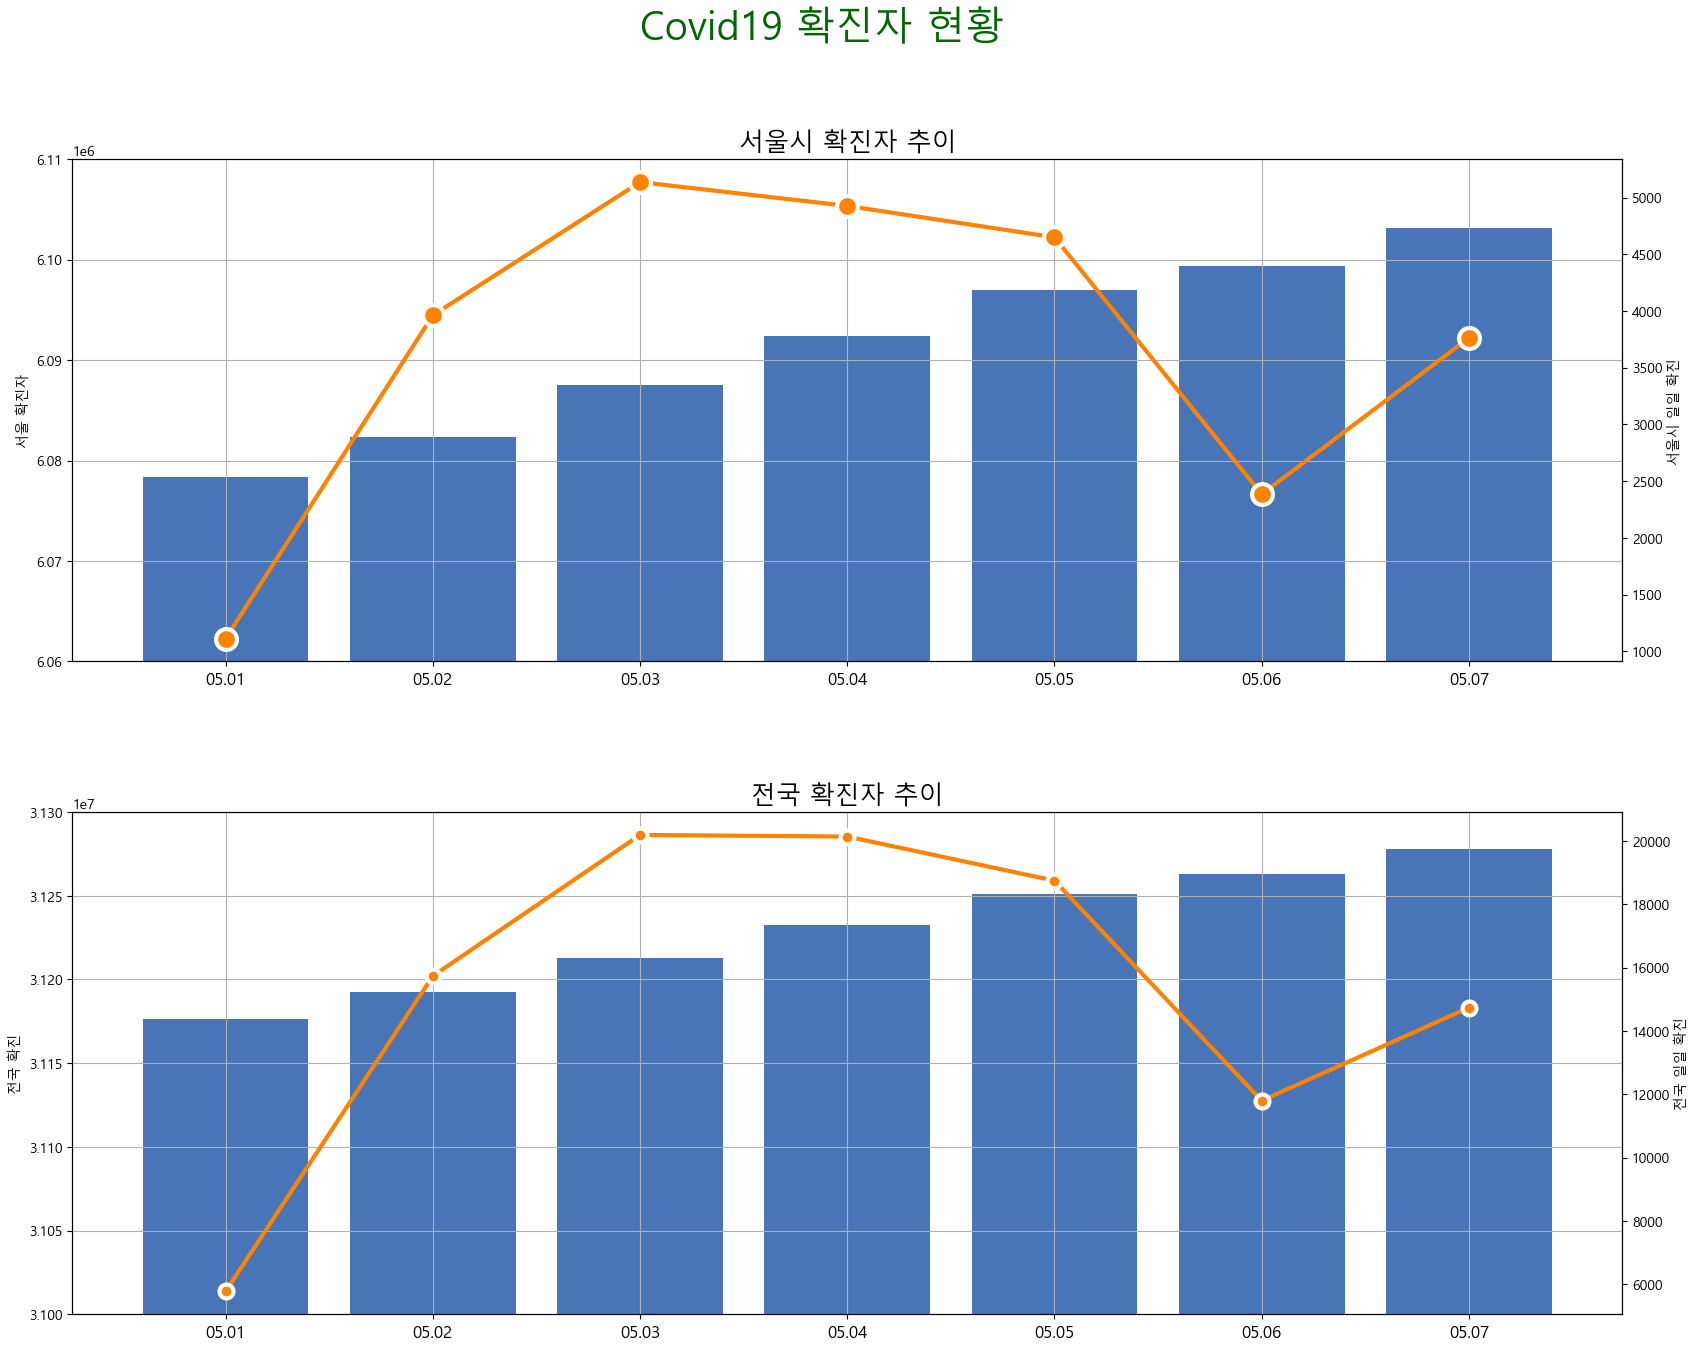

In [34]:
origin = load_data('covid19_full')
origin

[data] https://data.hossam.kr/data/lab06/covid19_full.xlsx
[desc] 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 일단위로 기록한 실제 데이터 (자체수집)
[!] Cannot read metadata


,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [35]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          1212 non-null   object 
 1   서울시 누적 확진자  1212 non-null   int64  
 2   서울시 일일 확진   1211 non-null   float64
 3   서울시 치료중     1212 non-null   int64  
 4   서울시 퇴원      770 non-null    float64
 5   서울시 추가 퇴원   770 non-null    float64
 6   서울시 누적 사망   1212 non-null   int64  
 7   서울시 일일 사망   458 non-null    float64
 8   전국 누적 확진    1212 non-null   float64
 9   전국 일일 확진    1211 non-null   float64
 10  전국 치료중      1212 non-null   int64  
 11  전국 퇴원       770 non-null    float64
 12  전국 당일 사망    458 non-null    float64
 13  전국 누적 사망    1212 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 132.7+ KB


In [ ]:
#날짜 데이터 형변환 진행 - 사용자로부터 입력받은 날짜와 계산이 되어야 하니까 datetime으로 변환
import pandas as pd
df = origin.copy()
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')
df


,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [109]:
#사용자로부터 날짜를 yyyymmdd 8자리 문자열로 입력받고 그 날짜를 시작으로 1주일간의 데이터 추출
input_date = input("날짜를 8자리 문자열로 입력하세요(예시: 20251127)")

#입력 받은 날짜를 datetime 형식으로 변환
start_date = pd.to_datetime(input_date, format='%Y%m%d')
end_date = start_date + pd.Timedelta(days=6)  # 1주일

#해당 기간의 데이터 필터링
calc_week = (df['날짜'] >= start_date) & (df['날짜'] <= end_date)

week_data = df.loc[calc_week]
week_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 24 to 30
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          7 non-null      datetime64[ns]
 1   서울시 누적 확진자  7 non-null      int64         
 2   서울시 일일 확진   7 non-null      float64       
 3   서울시 치료중     7 non-null      int64         
 4   서울시 퇴원      0 non-null      float64       
 5   서울시 추가 퇴원   0 non-null      float64       
 6   서울시 누적 사망   7 non-null      int64         
 7   서울시 일일 사망   7 non-null      float64       
 8   전국 누적 확진    7 non-null      float64       
 9   전국 일일 확진    7 non-null      float64       
 10  전국 치료중      7 non-null      int64         
 11  전국 퇴원       0 non-null      float64       
 12  전국 당일 사망    7 non-null      float64       
 13  전국 누적 사망    7 non-null      int64         
dtypes: datetime64[ns](1), float64(8), int64(5)
memory usage: 840.0 bytes


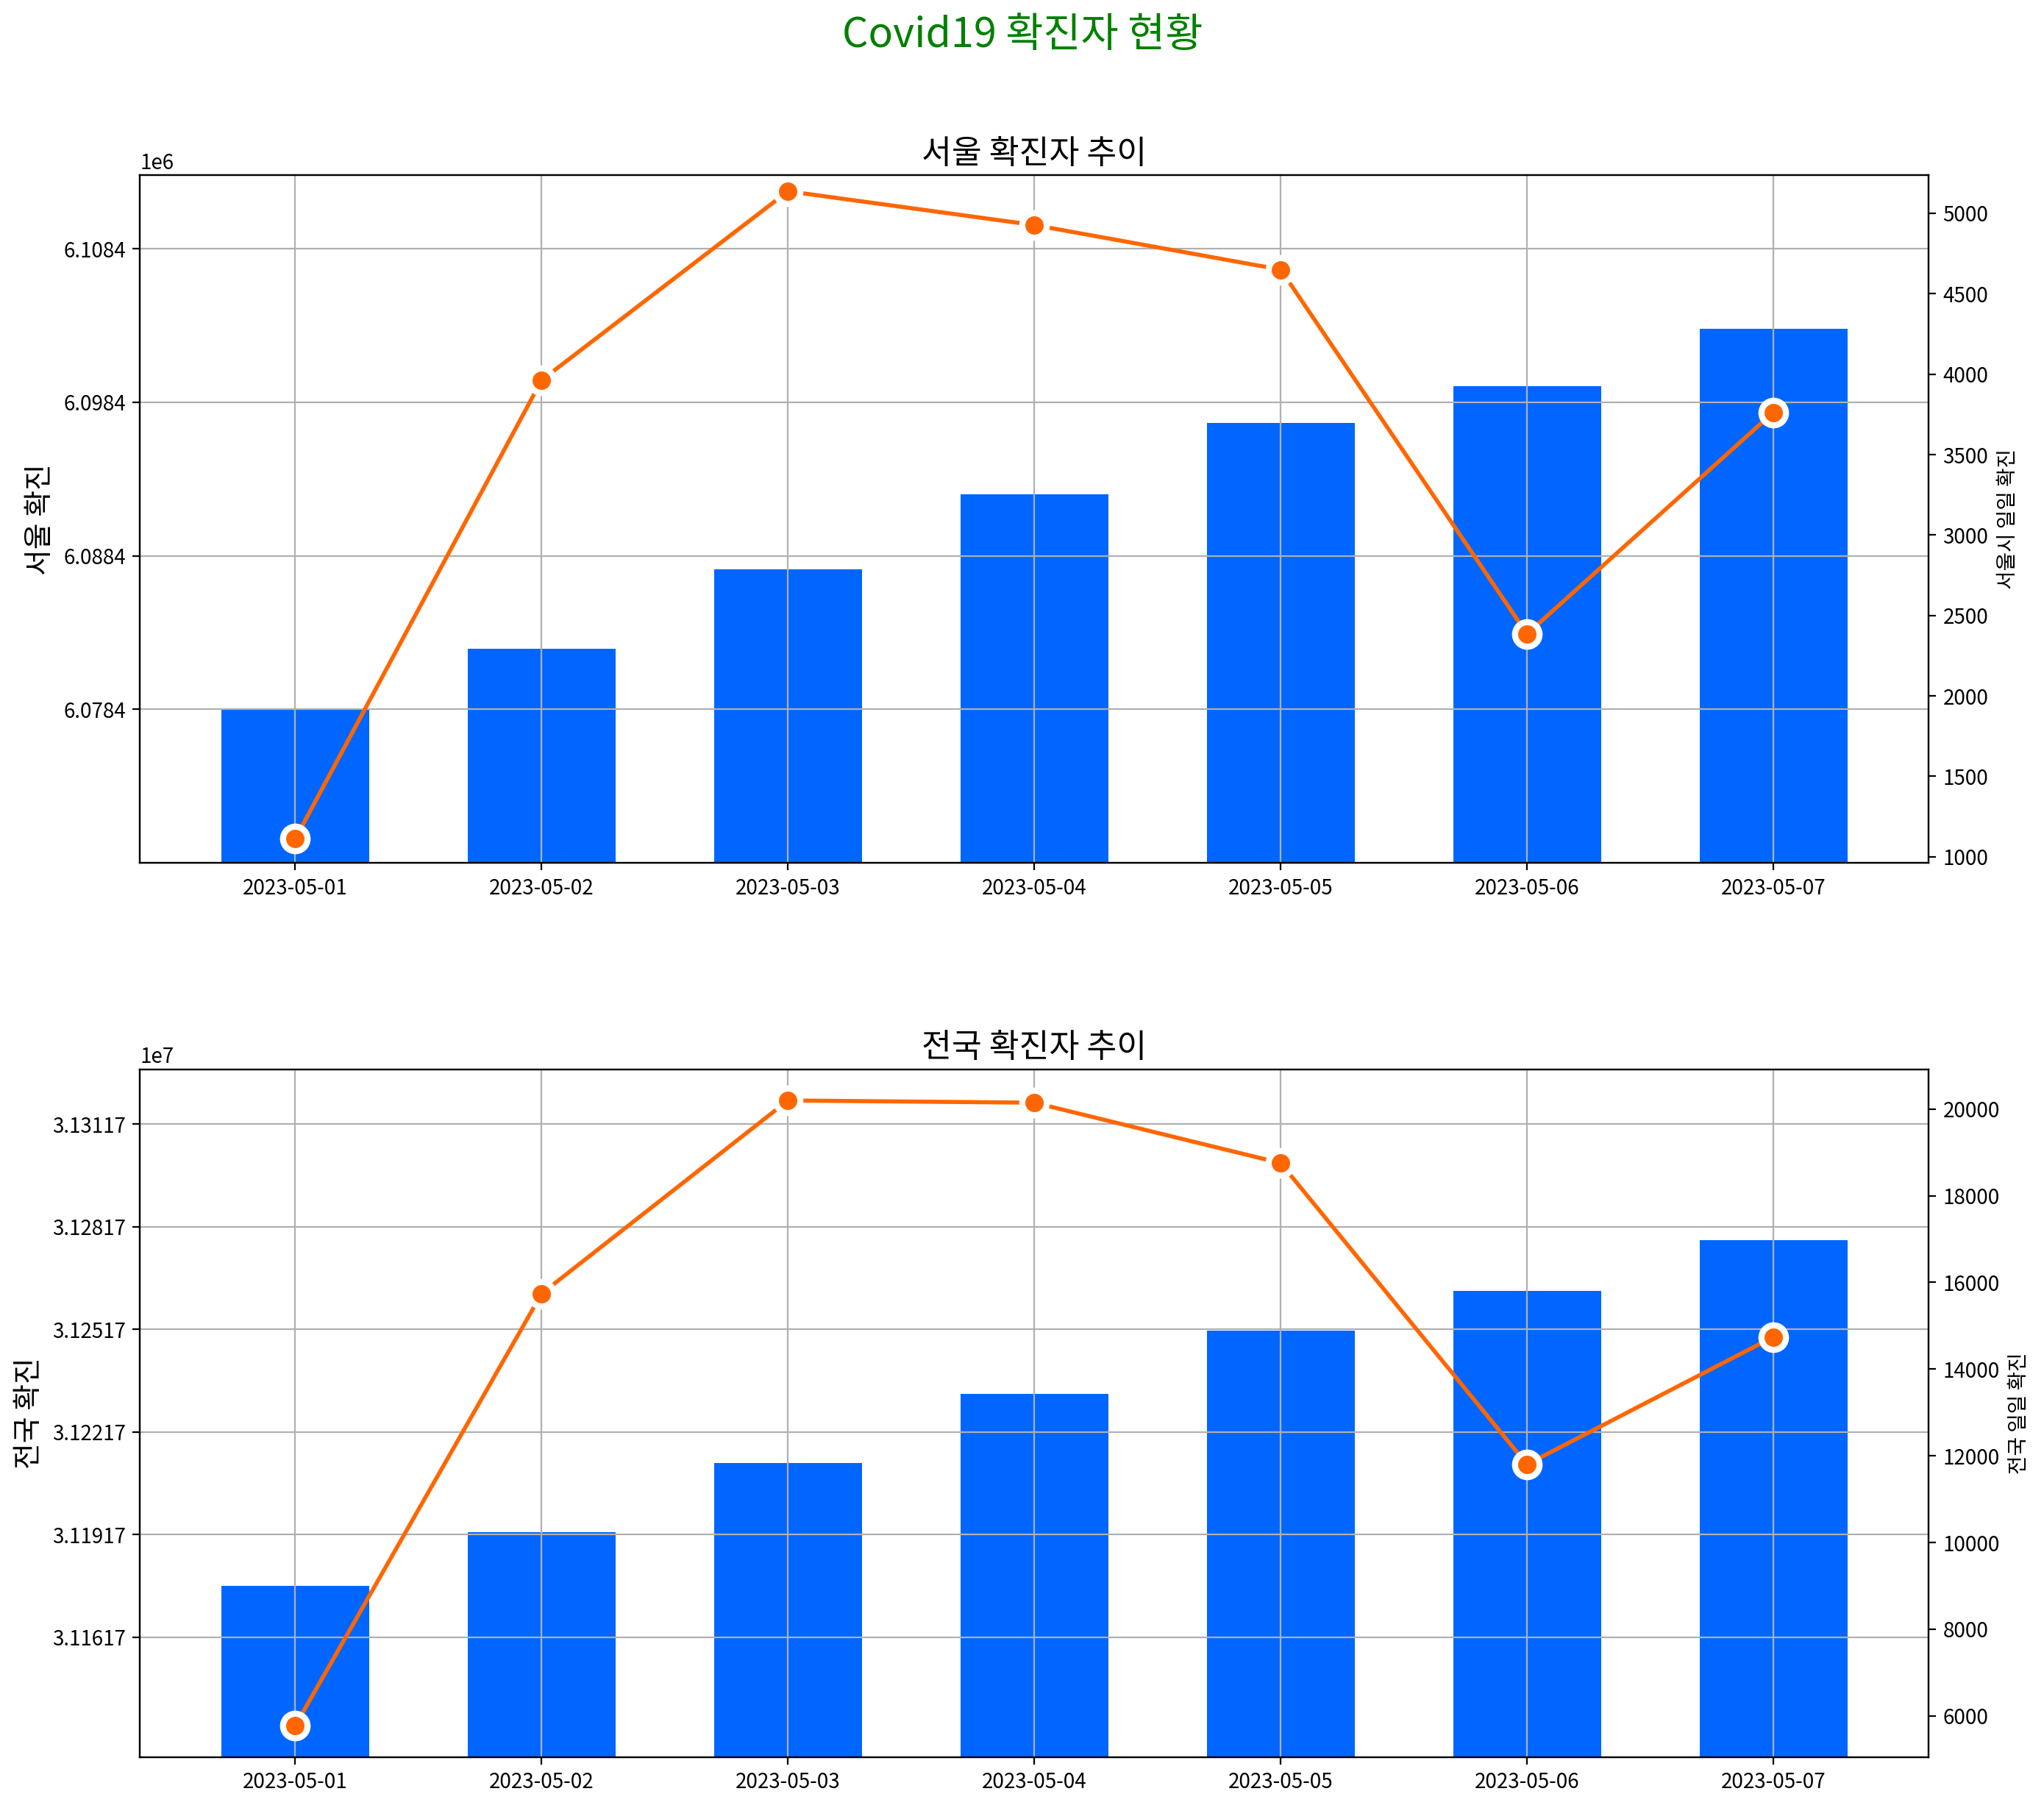

In [214]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2800             #그래프 가로 크기
height_px = 2400             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, (ax,ax2) = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

ax1=ax.twinx()

# 2) 그래프 그리기 -> seaborn 사용
# sb.boxplot(data=df1, orient='h')
ax.bar(week_data['날짜'], week_data['서울시 누적 확진자'], color="#0066ff", label='서울 확진자', width=0.6)
sb.lineplot(data=week_data, x=week_data['날짜'], y='서울시 일일 확진', color='#ff6600', ax=ax1, label='서울 일일 확진',
             marker='o', markersize=12, linewidth=2, markeredgecolor='white', markeredgewidth=3,legend=False)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

ax.set_title('서울 확진자 추이', fontsize=16)

ax.set_ylabel('서울 확진', fontsize=14)
ax.set_ylim(week_data['서울시 누적 확진자'].min()-10000, week_data['서울시 누적 확진자'].max()+10000)
ax1.set_ylim(week_data['서울시 일일 확진'].min()-150, week_data['서울시 일일 확진'].max()+100)

ax.set_yticks(np.arange(week_data['서울시 누적 확진자'].min(), week_data['서울시 누적 확진자'].max()+10000, 10000))
ax1.set_yticks(np.arange(1000, week_data['서울시 일일 확진'].max()+100, 500))

# ---------------------------------
# 두 번째 영역
# 영역 간의 간격 조정
ax2_twin=ax2.twinx()

ax2.bar(week_data['날짜'], week_data['전국 누적 확진'], color="#0066ff", label='전국 확진자', width=0.6)
sb.lineplot(data=week_data, x=week_data['날짜'], y='전국 일일 확진', color='#ff6600', ax=ax2_twin, label='전국 일일 확진',
             marker='o', markersize=12, linewidth=2, markeredgecolor='white', markeredgewidth=3, legend=False)

ax2.set_ylabel('전국 확진', fontsize=14)
ax2.set_title('전국 확진자 추이', fontsize=16)
ax2.grid()
ax2.set_ylim(week_data['전국 누적 확진'].min()-50000, week_data['전국 누적 확진'].max()+50000)
ax2.set_yticks(np.arange(week_data['전국 누적 확진'].min()-15000, week_data['전국 누적 확진'].max()+35000, 30000))

# 4) 출력
plt.suptitle("Covid19 확진자 현황", fontsize=20, color="green", y=1.02)

plt.tight_layout()                      #여백 제거
plt.subplots_adjust(hspace=0.3)
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

### #04. ADsP 기출 데이터셋 활용
---
mpg 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다.

### 문제 1
---
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

In [262]:
origin=load_data('mpg')
origin

[data] https://data.hossam.kr/data/lab06/mpg.xlsx
[desc] 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터 (출처: ADsP 기출 / R 내장 데이터)

field         description
------------  ----------------------------------------------------
manufacturer  자동차 제조사
model         자동차 모델명
displ         자동차 배기량
year          제조년도
cyl           엔진 실린더 수
trans         자동차 트랜스미션 종류
drv           자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동
cty           도심 연비 (마일/갤론)
hwy           고속도로 연비 (마일/갤론)
fl            연료 종류
class         자동차 분류



,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [290]:
df=origin.copy()
df2 = df.filter(['manufacturer','id']).groupby('manufacturer').count()
df2
df2['자동차 수'] = df2['id']
df2.drop('id', axis=1, inplace=True)
df2

,자동차 수
manufacturer,
audi,18
chevrolet,19
dodge,37
ford,25
honda,9
hyundai,14
jeep,8
land rover,4
lincoln,3


In [227]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 3
plt.rcParams['axes.unicode_minus'] = False

C:\Users\itwill\AppData\Local\Temp\ipykernel_7960\1545894115.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x='manufacturer',palette='Pastel1')


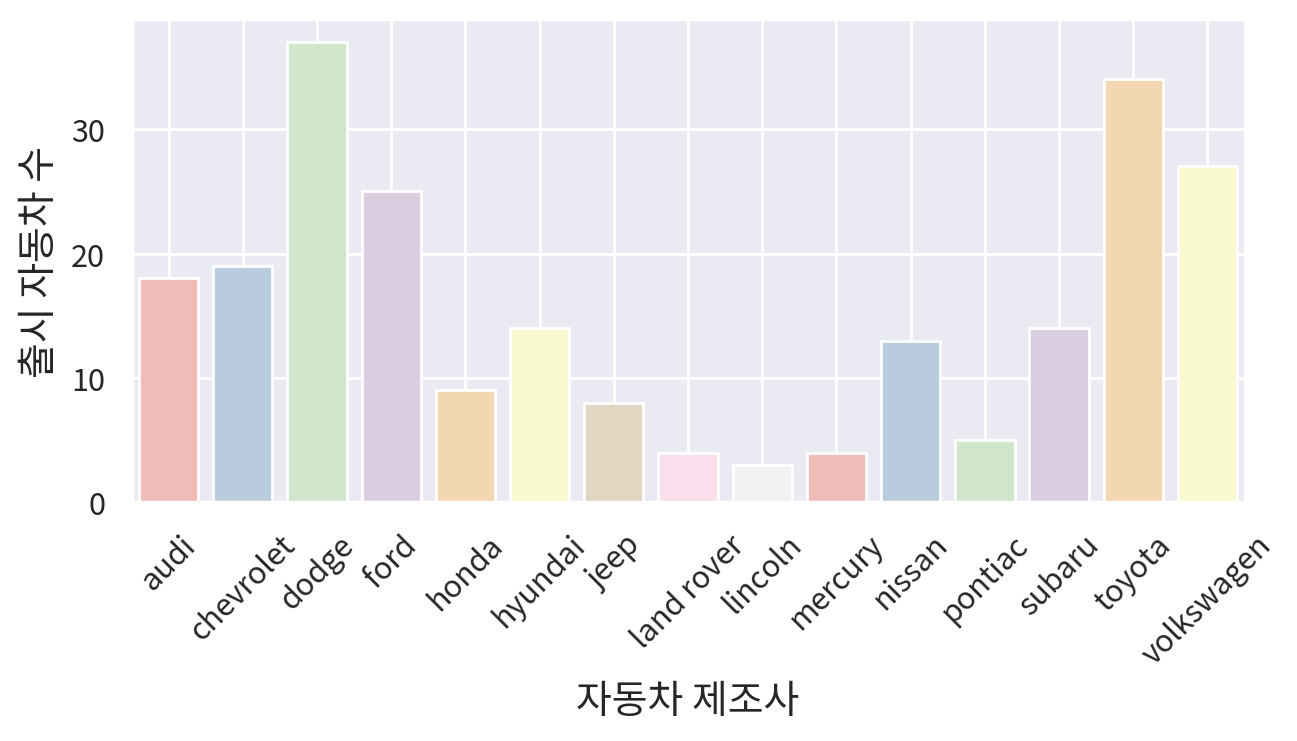

In [344]:
# # 자동차 제조사 별로 출시한 자동차 수 시각화
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

sb.countplot(data=df, x='manufacturer',palette='Pastel1')

ax.grid(True)
ax.set_ylabel('출시 자동차 수', fontsize=14)
ax.set_xlabel('자동차 제조사', fontsize=14)
# # 4) 출력
plt.xticks(rotation=45)
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료


### 문제 2
---
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

In [ ]:
# 자동차 제조사에 따른 자동차 수 컬럼 추가한 데이터 프레임 생성
df3 = df.merge(df2, how='left', left_on='manufacturer', right_index=True)
df3

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,자동차 수
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,18
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,18
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,18
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,18
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,27
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,27
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,27
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,27


In [328]:
# 제조사,연도별 출시한 자동차 수
df=origin.copy()
df4 = df.filter(['manufacturer','year','id']).groupby(['manufacturer','year']).count()
df4['자동차 수'] = df4['id']
df4.drop('id', axis=1, inplace=True)
df4 = df4.reset_index()
df4

,manufacturer,year,자동차 수
0,audi,1999,9
1,audi,2008,9
2,chevrolet,1999,7
3,chevrolet,2008,12
4,dodge,1999,16
5,dodge,2008,21
6,ford,1999,15
7,ford,2008,10
8,honda,1999,5
9,honda,2008,4


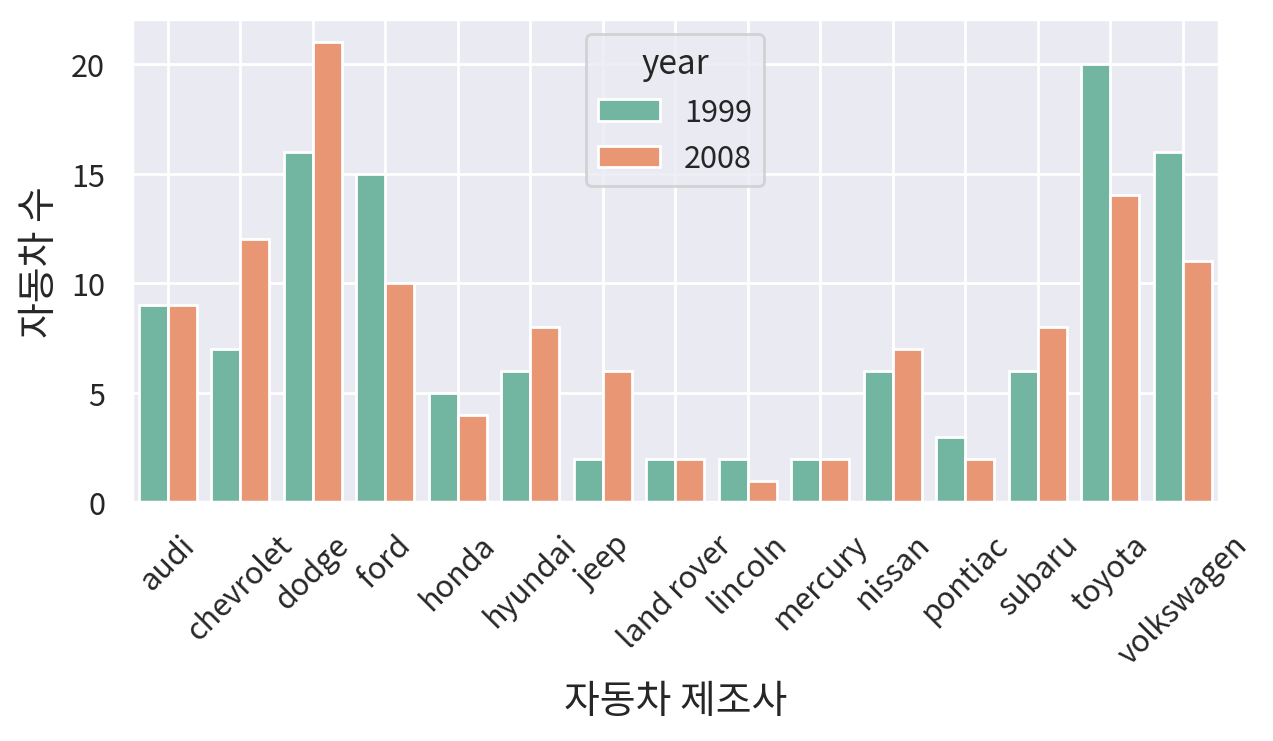

In [329]:
#자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
# 2) barplot 그리기
sb.barplot(
    data=df4,
    x='manufacturer',
    y='자동차 수',
    hue='year',
    palette="Set2"
)
# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)
ax.set_ylabel('자동차 수', fontsize=14)
ax.set_xlabel('자동차 제조사', fontsize=14)
# 4) 출력
plt.xticks(rotation=45)
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료


왜... countplot을 쓰지 않았는가에 대하여........................

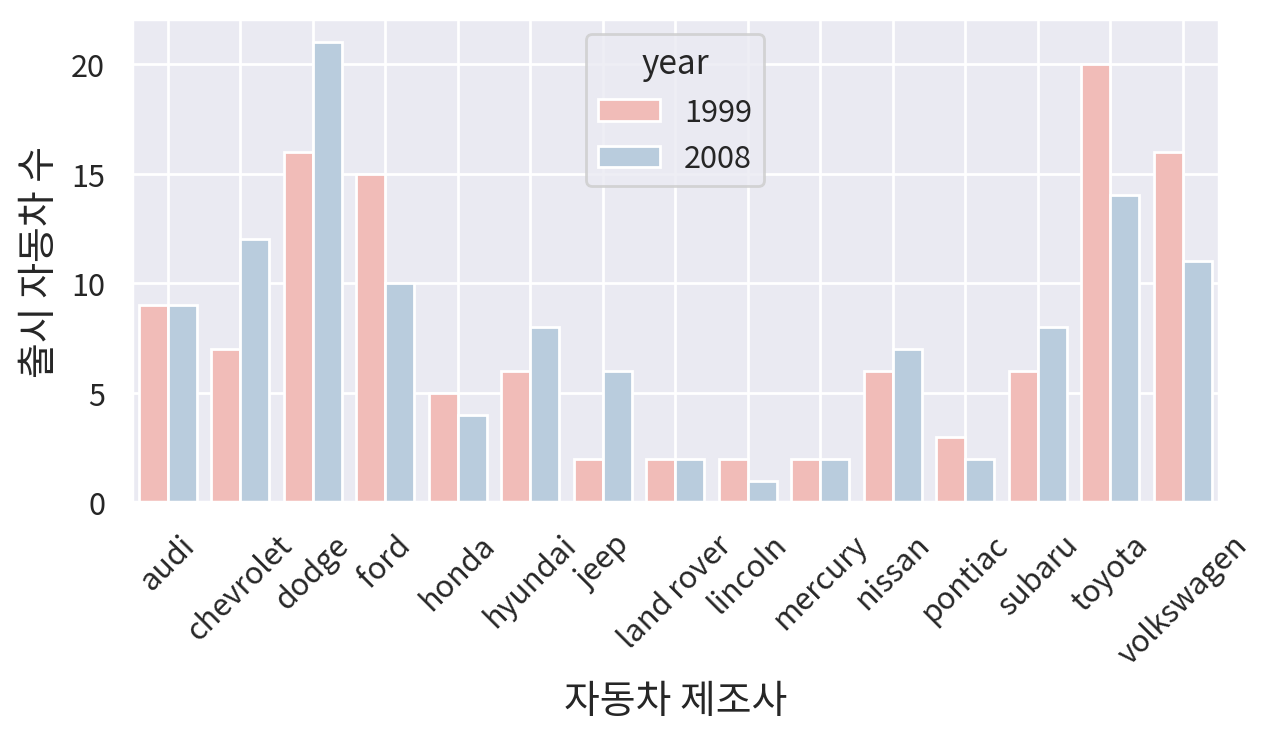

In [346]:
# # 자동차 제조사 별로 출시한 자동차 수 시각화
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

sb.countplot(data=df, x='manufacturer',hue='year',palette='Pastel1')

ax.grid(True)
ax.set_ylabel('출시 자동차 수', fontsize=14)
ax.set_xlabel('자동차 제조사', fontsize=14)
# # 4) 출력
plt.xticks(rotation=45)
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료


### 문제 3
---
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

In [331]:
# x = 구동방식
# y = 자동차 수

df5=origin.copy()
df5 = df5.filter(['drv','id']).groupby('drv').count()
df5
df5['자동차 수'] = df5['id']
df5.drop('id', axis=1, inplace=True)
df5

,자동차 수
drv,
4,103
f,106
r,25


C:\Users\itwill\AppData\Local\Temp\ipykernel_7960\1286767114.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x='drv',palette='Pastel1')


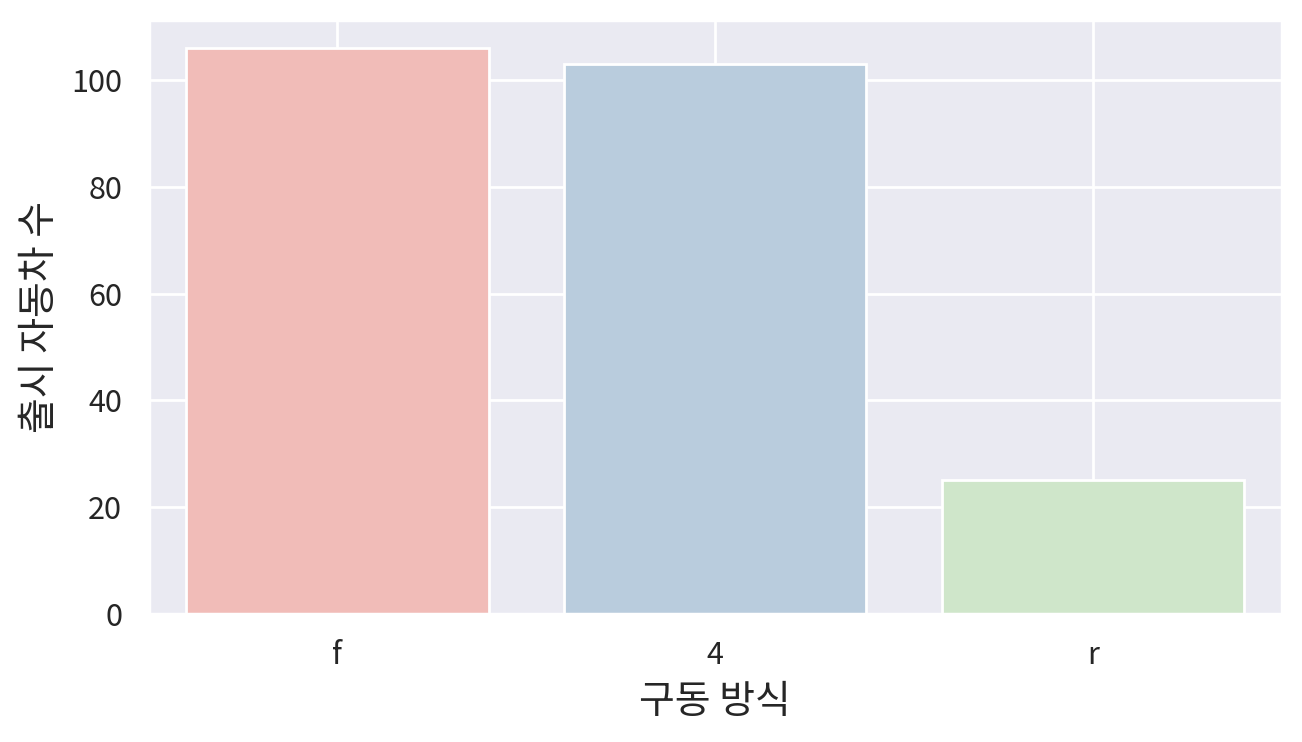

In [350]:
# 자동차 구동방식 별로 출시한 자동차 수 시각화
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

sb.countplot(data=df, x='drv',palette='Pastel1')

ax.grid(True)
ax.set_ylabel('출시 자동차 수', fontsize=14)
ax.set_xlabel('구동 방식', fontsize=14)
# 4) 출력

plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료


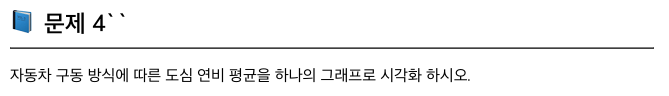

In [353]:
# 자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.
df6=origin.copy()
df6 = df6.filter(['drv','cty']).groupby('drv').mean()
df6
df6['도심 연비 평균'] = df6['cty']
df6.drop('cty', axis=1, inplace=True)
df6 

,도심 연비 평균
drv,
4,14.330097
f,19.971698
r,14.080000


C:\Users\itwill\AppData\Local\Temp\ipykernel_7960\3241701203.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df6, x='drv', y='도심 연비 평균', palette='Pastel1')


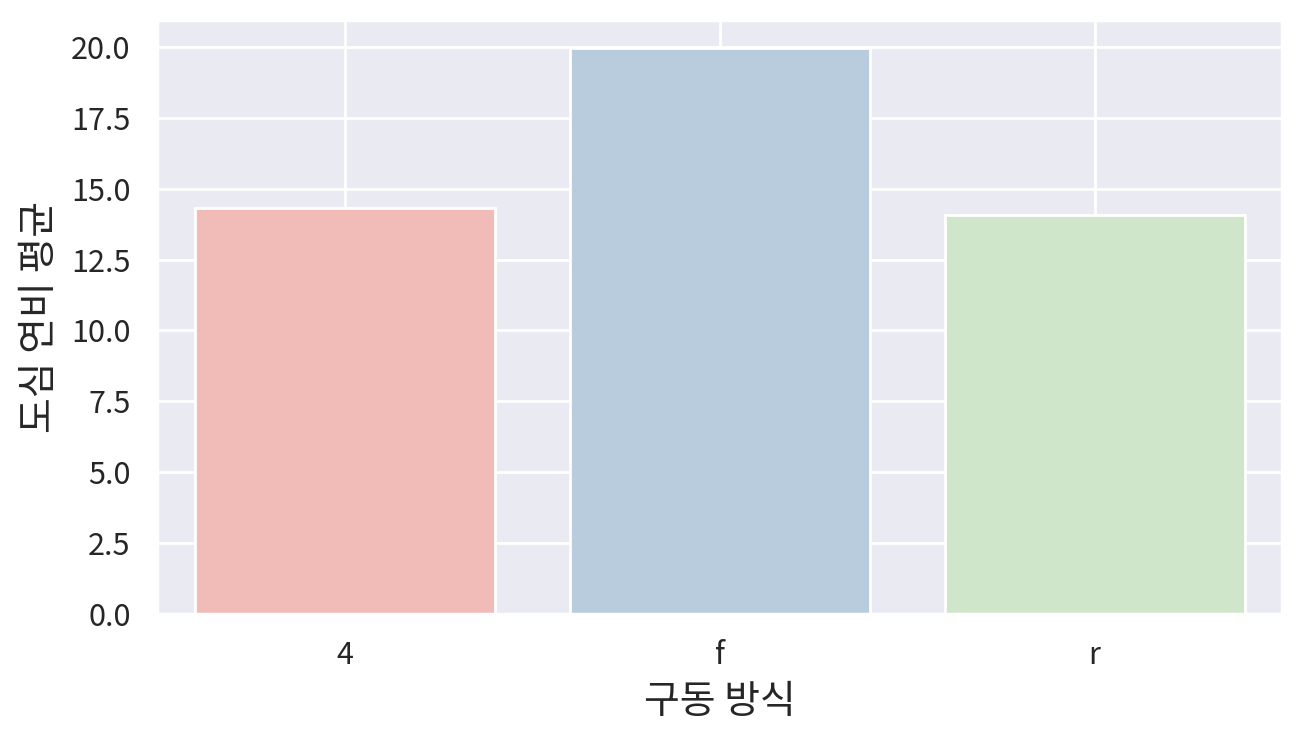

In [ ]:
# 자동차 구동방식 별로 도심 연비 평균 시각화
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

sb.barplot(data=df6, x='drv', y='도심 연비 평균', palette='Pastel1')

ax.grid(True)
ax.set_ylabel('도심 연비 평균', fontsize=14)
ax.set_xlabel('구동 방식', fontsize=14)
# 4) 출력

plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료


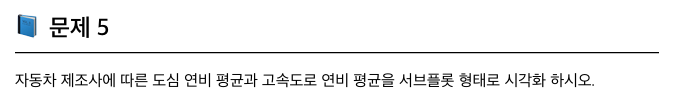

In [355]:
# 자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화
df7=origin.copy()
df7 = df7.filter(['manufacturer','cty','hwy']).groupby('manufacturer').mean()
df7
df7['도심 연비 평균'] = df7['cty']
df7['고속도로 연비 평균'] = df7['hwy']
df7.drop(['cty','hwy'], axis=1, inplace=True)
df7

,도심 연비 평균,고속도로 연비 평균
manufacturer,,
audi,17.611111,26.444444
chevrolet,15.000000,21.894737
dodge,13.135135,17.945946
ford,14.000000,19.360000
honda,24.444444,32.555556
hyundai,18.642857,26.857143
jeep,13.500000,17.625000
land rover,11.500000,16.500000
lincoln,11.333333,17.000000


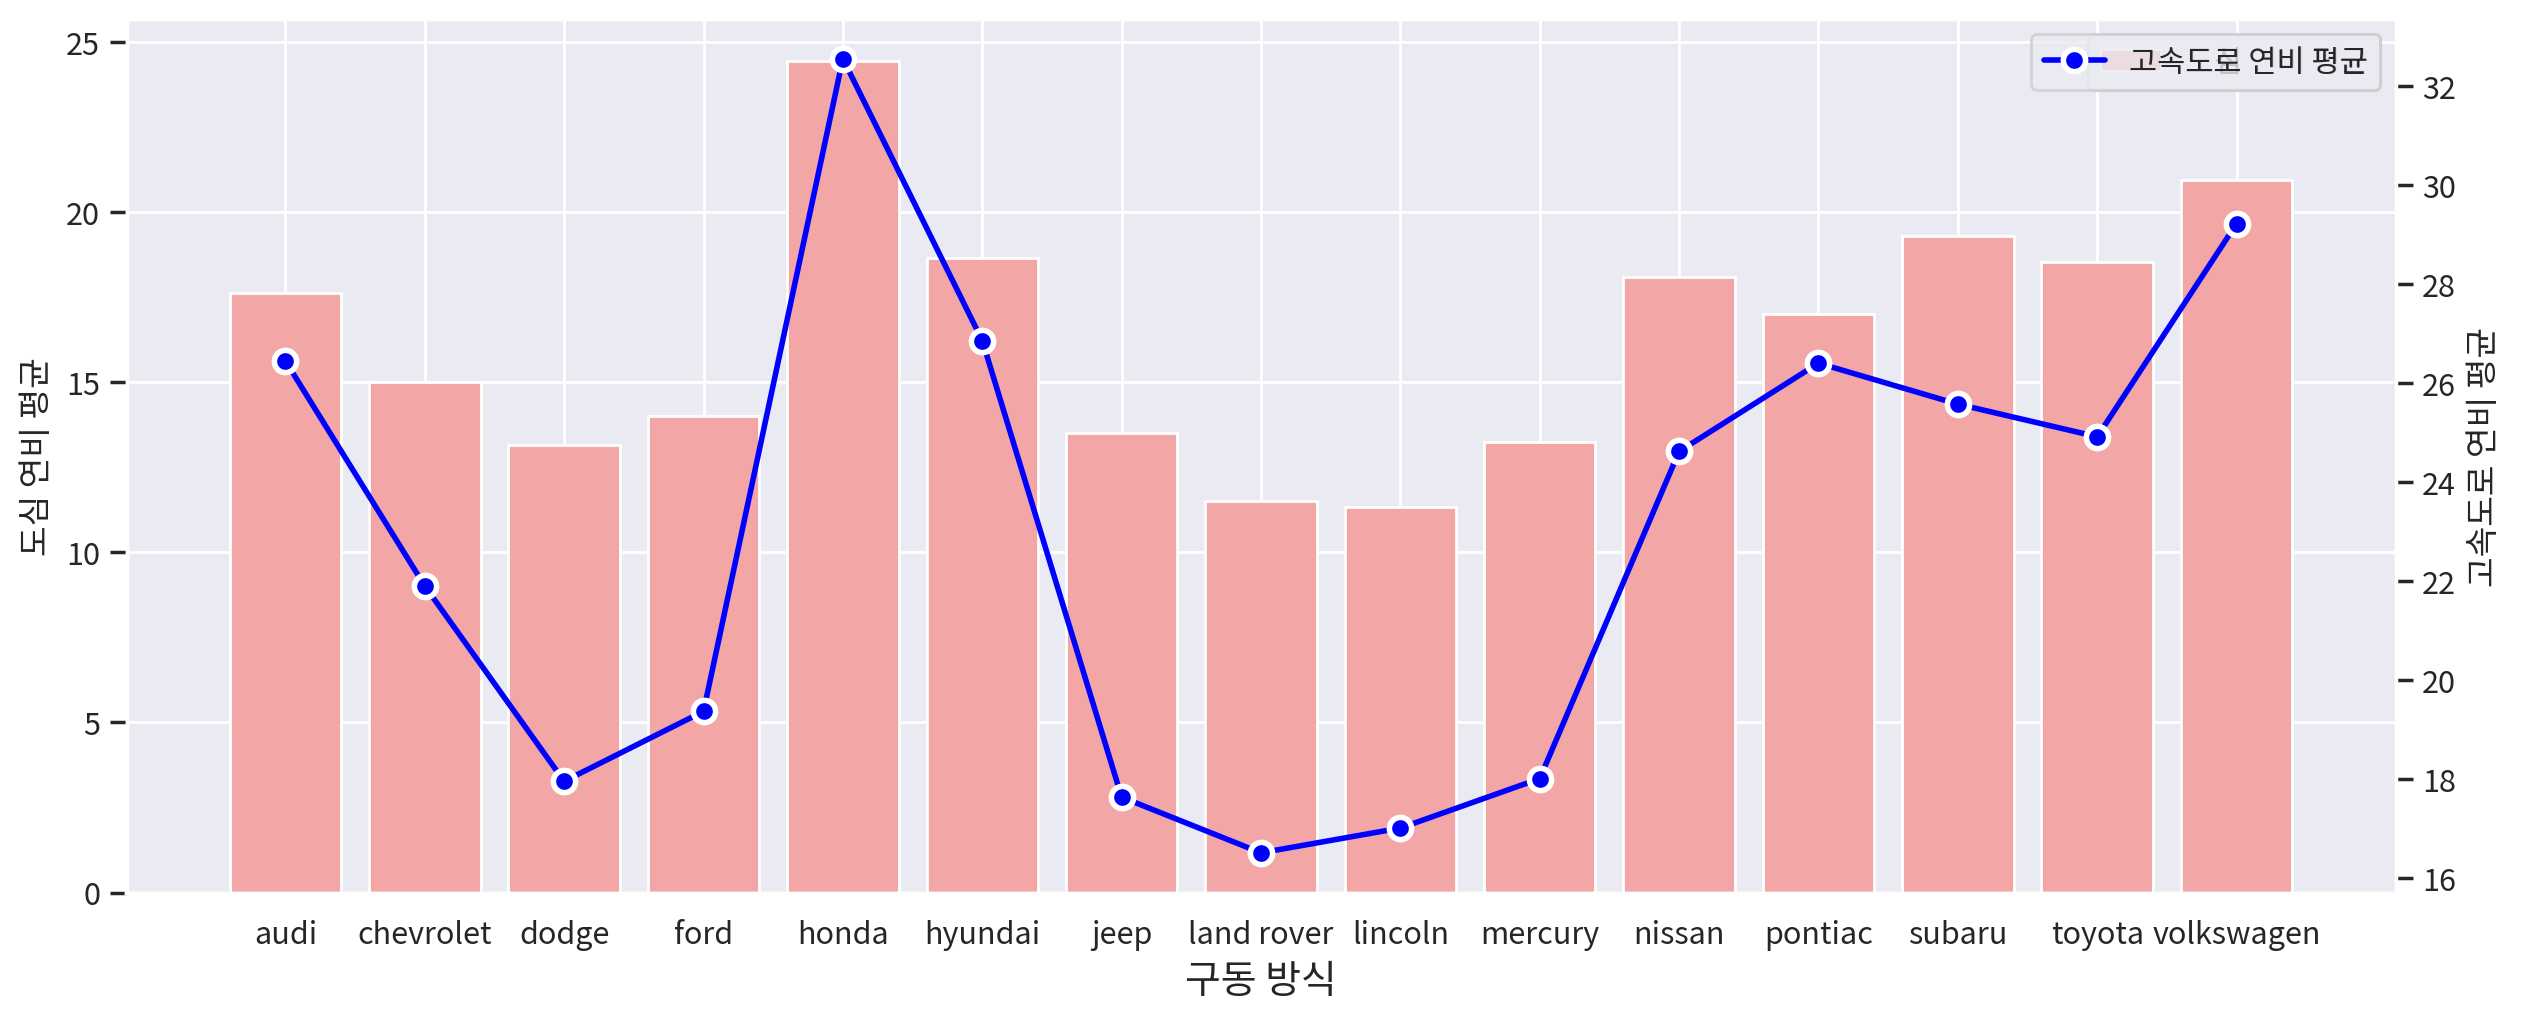

In [374]:
# 자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균 시각화
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2500             #그래프 가로 크기
height_px = 1000             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
ax2=ax.twinx()
sb.barplot(data=df7, x='manufacturer', y='도심 연비 평균',color='#ff9999',ax=ax,label='도심 연비 평균')
sb.lineplot(data=df7, x='manufacturer', y='고속도로 연비 평균',color='#0000ff',ax=ax2,label='고속도로 연비 평균'
            ,marker='o', markersize=8, linewidth=2, markeredgecolor='white', markeredgewidth=2)
ax.grid(True)
ax.set_xlabel('구동 방식', fontsize=14)

# 4) 출력

plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료


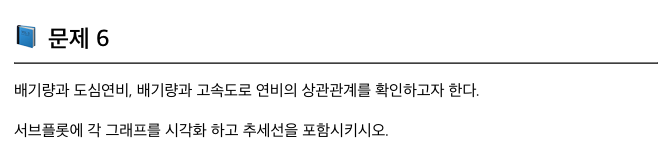

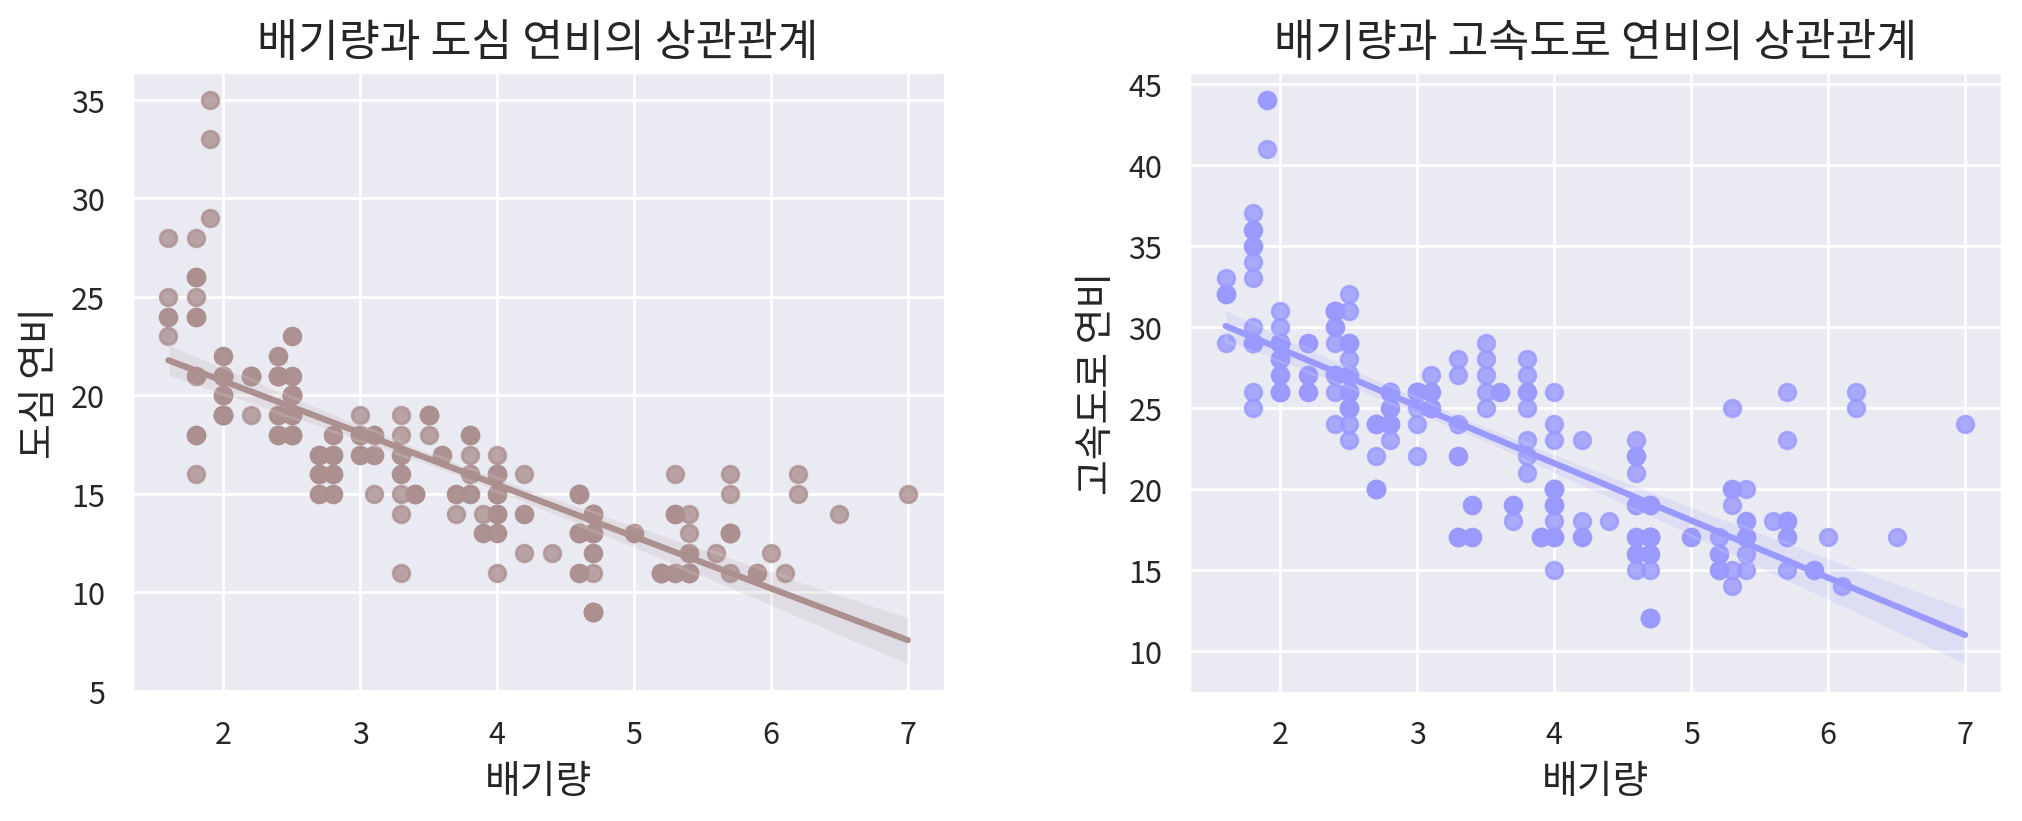

In [ ]:
# 배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인해보자
# 추세선 추가하기
df8=origin.copy()
df8 = df8.filter(['displ','cty','hwy'])
df8
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 800             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 2                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, (ax,ax2) = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
# 2) 그래프 그리기 추세선 포함해야하니까 regplot 사용(산점도에 추세선 추가한거)
sb.regplot(data=df8, x='displ', y='cty', ax=ax, color="#ac9090")
sb.regplot(data=df8, x='displ', y='hwy', ax=ax2, color='#9999ff')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.set_title('배기량과 도심 연비의 상관관계', fontsize=16)
ax.set_ylabel('도심 연비', fontsize=14)
ax.set_xlabel('배기량', fontsize=14)
ax.grid()
ax2.set_title('배기량과 고속도로 연비의 상관관계', fontsize=16)
ax2.set_ylabel('고속도로 연비', fontsize=14)
ax2.set_xlabel('배기량', fontsize=14)
ax2.grid()
# 4) 출력
plt.tight_layout()                      #여백 제거
plt.subplots_adjust(wspace=0.3)         #그래프 간격 조정
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

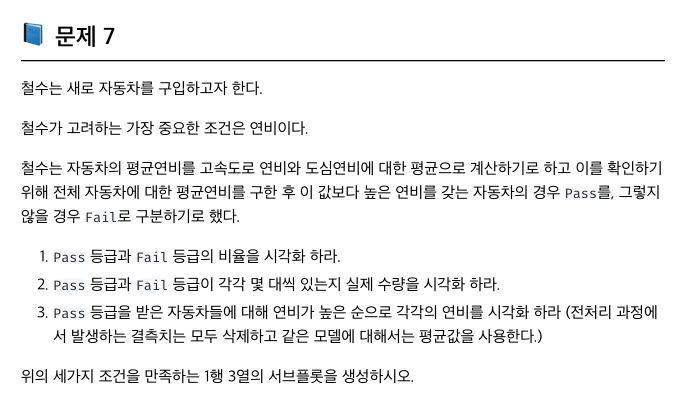